--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>Understanding the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('stock_price.csv')
print(df.head())

        Date  Closing Price  Opening Price  High Price  Low Price   Volume  \
0   8/1/2024          156.3          159.3       159.4      156.1   79.15M   
1  7/31/2024          160.4          158.2       160.7      158.1  173.91M   
2  7/30/2024          158.7          158.8       159.2      158.0  138.14M   
3  7/29/2024          159.7          158.7       160.2      158.4  126.28M   
4  7/26/2024          157.9          159.3       159.6      157.9  155.08M   

  Percentage Change  
0            -2.56%  
1             1.07%  
2            -0.63%  
3             1.14%  
4            -0.13%  


<h1>Exploratory Data Analysis

Basic Statistics:
        Closing Price  Opening Price   High Price    Low Price
count    9202.000000    9202.000000  9202.000000  9202.000000
mean       92.180961      92.256183    93.176451    91.330146
std        50.452228      50.598215    51.049837    50.087405
min        33.000000      33.000000    33.200000    32.200000
25%        52.000000      52.100000    52.800000    51.500000
50%        85.100000      85.100000    86.050000    84.200000
75%       110.800000     110.800000   111.900000   109.275000
max       305.900000     309.800000   311.800000   303.900000

Mean Closing Price: 92.18096066072593
Variance of Closing Price: 2545.4273322799504


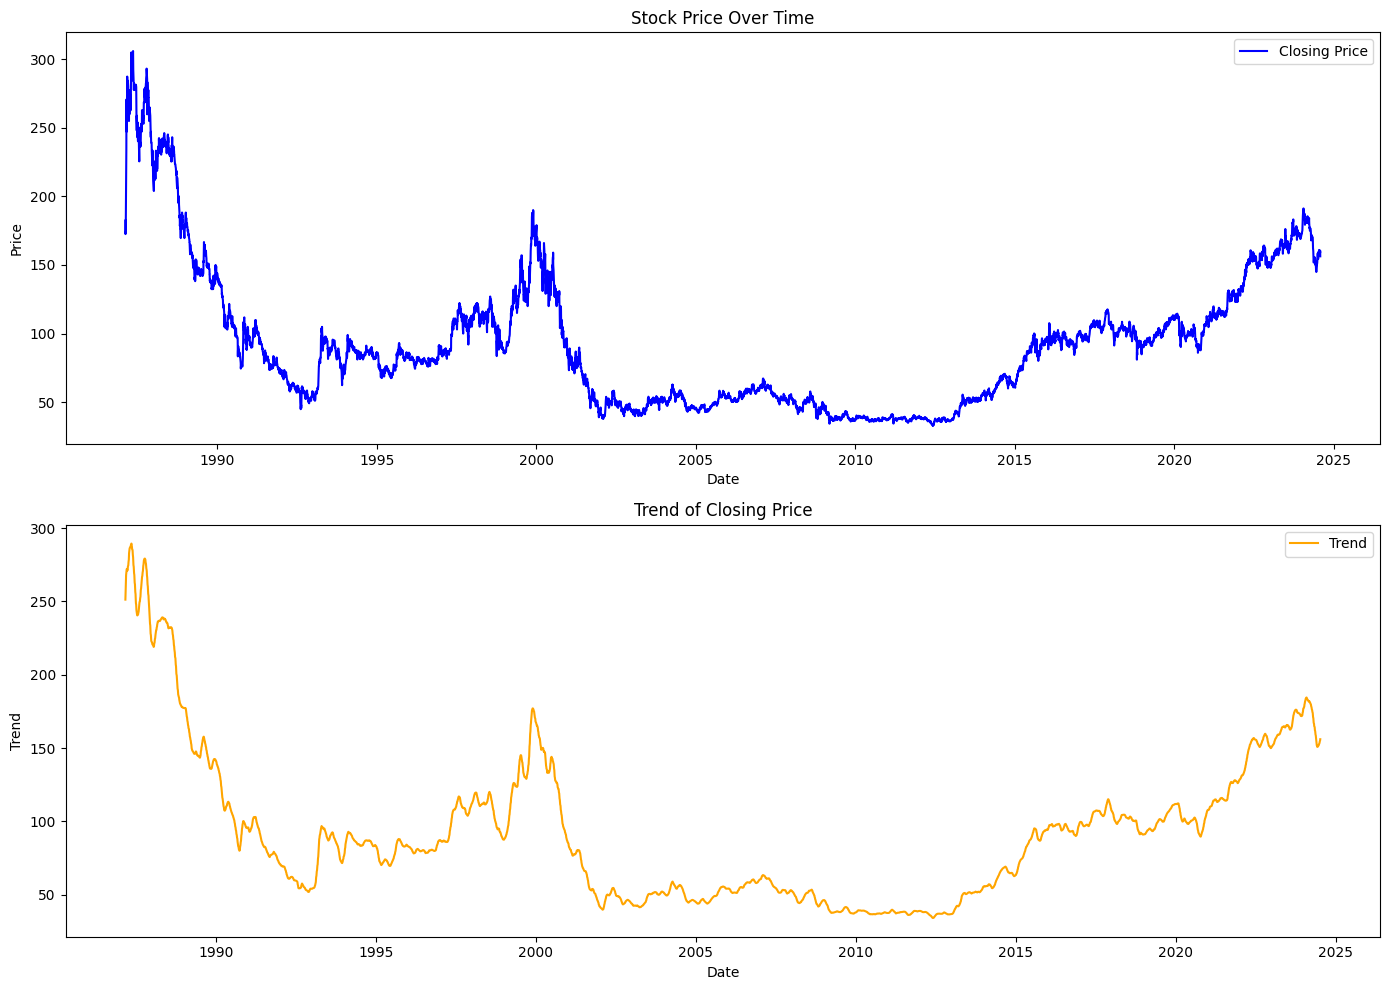

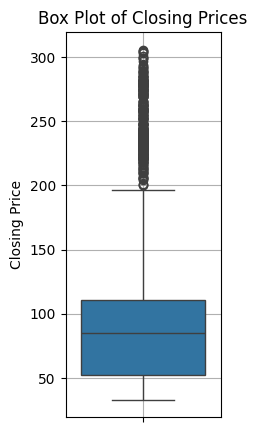

In [2]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display basic statistics
basic_stats = df.describe()
print("Basic Statistics:\n", basic_stats)

# Mean and Variance
mean_closing_price = df['Closing Price'].mean()
variance_closing_price = df['Closing Price'].var()
print(f"\nMean Closing Price: {mean_closing_price}")
print(f"Variance of Closing Price: {variance_closing_price}")

# Identifying trends, seasonality, and anomalies
decomposition = seasonal_decompose(df['Closing Price'], model='additive', period=30)  # Assuming monthly seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting
plt.figure(figsize=(14, 10))

# Line plot of Closing Price
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Closing Price'], label='Closing Price', color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Trend plot
plt.subplot(2, 1, 2)
plt.plot(df.index, trend, label='Trend', color='orange')
plt.title('Trend of Closing Price')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(2, 5))
sns.boxplot(y=df['Closing Price'])
plt.title('Box Plot of Closing Prices')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


<h1> Data Preprocessing


Missing Values in Each Column:
Closing Price        0
Opening Price        0
High Price           0
Low Price            0
Volume               0
Percentage Change    0
dtype: int64


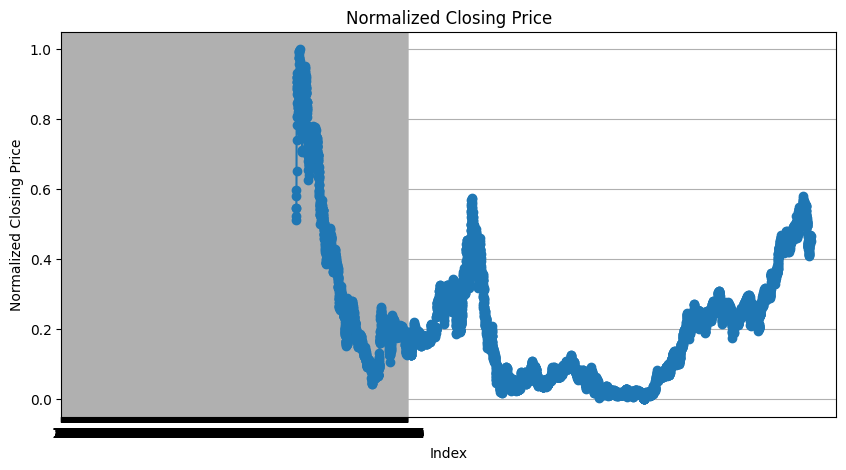

In [3]:
#Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

#:Drop rows with missing values
df = df.dropna()

# Normalizing the 'Closing Price' column
df['Normalized Closing Price'] = (df['Closing Price'] - df['Closing Price'].min()) / (df['Closing Price'].max() - df['Closing Price'].min())

# Plotting the normalized closing prices
plt.figure(figsize=(10, 5))
plt.plot(df['Normalized Closing Price'], marker='o', linestyle='-')
plt.title('Normalized Closing Price')
plt.xlabel('Index')
plt.ylabel('Normalized Closing Price')
plt.grid()
plt.xticks(range(len(df)), range(len(df)))
plt.show()

1. Date:      The date of the stock data.<br>
2. Closing Price: The price of the stock at market close.<br>
3. Opening Price: The price of the stock at market open.<br>
4. High Price: The highest price during the trading session.<br>
5. Low Price: The lowest price during the trading session.<br>
6. Volume: The number of shares traded.<br>
7. Percentage Change: The percentage change in price compared to the previous 
trading day.


In [4]:
# Convert relevant columns to numeric
numeric_cols = ['Closing Price', 'Opening Price', 'High Price', 'Low Price', 'Volume']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Generate summary statistics
summary = df[numeric_cols].agg(['mean', 'median', 'min', 'max']).transpose()

# Display the summary
print(summary)

                    mean  median   min    max
Closing Price  92.180961   85.10  33.0  305.9
Opening Price  92.256183   85.10  33.0  309.8
High Price     93.176451   86.05  33.2  311.8
Low Price      91.330146   84.20  32.2  303.9
Volume               NaN     NaN   NaN    NaN


To build a model that maximizes the prediction accuracy of stock prices, we can consider several approaches, such as ARIMA (AutoRegressive Integrated Moving Average) for traditional time series forecasting or LSTM (Long Short-Term Memory) networks for deep learning approaches.
<h3>Overview of Selected Models</h3>
<h4>1. ARIMA:</h4>
    <ul>
        <li>Type: Traditional statistical model for time series forecasting.</li>
        <li>Use Case: Suitable for univariate time series data that shows a trend or seasonality.</li>
        <li>Strengths:<ul>
        <li>Effective for short-term forecasting.</li>
        <li>Easy to interpret and implement.</li>
        <li>Good for data with linear patterns.</li>
                        </ul></li>
    </ul>
    <h4>2. LSTM:</h4>
    <ul>
        <li>Type: Recurrent Neural Network (RNN) architecture.</li>
        <li>Use Case: Designed for sequential data with long-range dependencies.</li>
        <li>Strengths:<ul>
        <li>Captures complex patterns in time series data.</li>
        <li>Handles non-linear relationships well.</li>
        <li>Suitable for larger datasets with multiple features.</li>
                        </ul></li>
    </ul>

<h1>LSTM Model Implementation</h1>

Epoch 1/50


C:\Users\Goku\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 0.0068
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 5.6964e-04
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 5.0160e-04
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 4.3206e-04
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 3.9506e-04
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.4479e-04
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.5004e-04
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.1392e-04
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.0233e-04
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.0125e-04
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 2.8042e-04
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 2.7812e-04
Epoch 13/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 2.6966e-04
Epoch 14/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 2.6089e-04
E

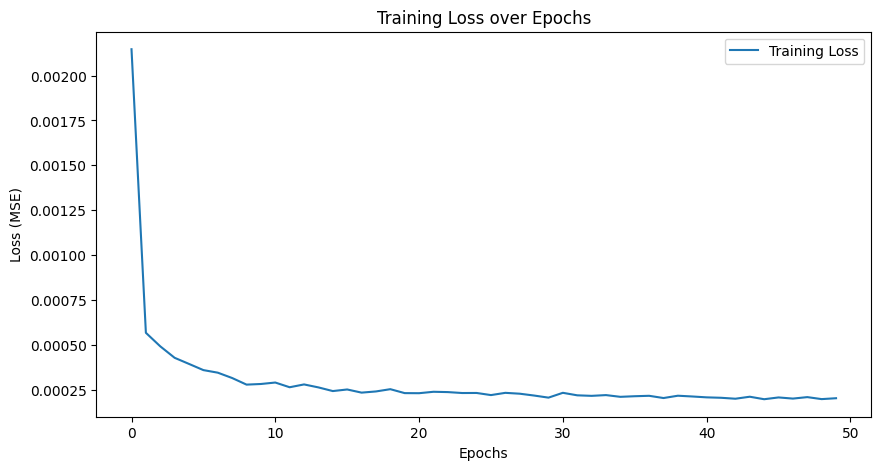

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings

# Load the dataset (assuming 'Date' is the index and 'Closing Price' is the target column)
df = pd.read_csv('stock_price.csv', index_col='Date', parse_dates=True)

# Use only the 'Closing Price' for prediction
data = df[['Closing Price']].values

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Hard-code the dataset creation for time step of 60 days
X, y = [], []
time_step = 60  # Lookback period for prediction

# Since df.shape = (9202, 6), we hard-code the loop to 9202 rows
for i in range(60, 9202):
    X.append(scaled_data[i-60:i, 0])  # Take 60 days of closing price data
    y.append(scaled_data[i, 0])  # The next day price as the target

# Convert lists to NumPy arrays
X, y = np.array(X), np.array(y)

# Reshape X to be 3D for LSTM: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training (70%) and testing (30%) sets
train_size = int(0.7 * X.shape[0])  # 70% of 9202 rows
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# A sequentail Mode. Add layers to it. Compile it with adam optimiser and loss =mse. then finally fit the model
# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))) #input_shape=(timesteps, features)
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer for stock price prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Plotting the training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


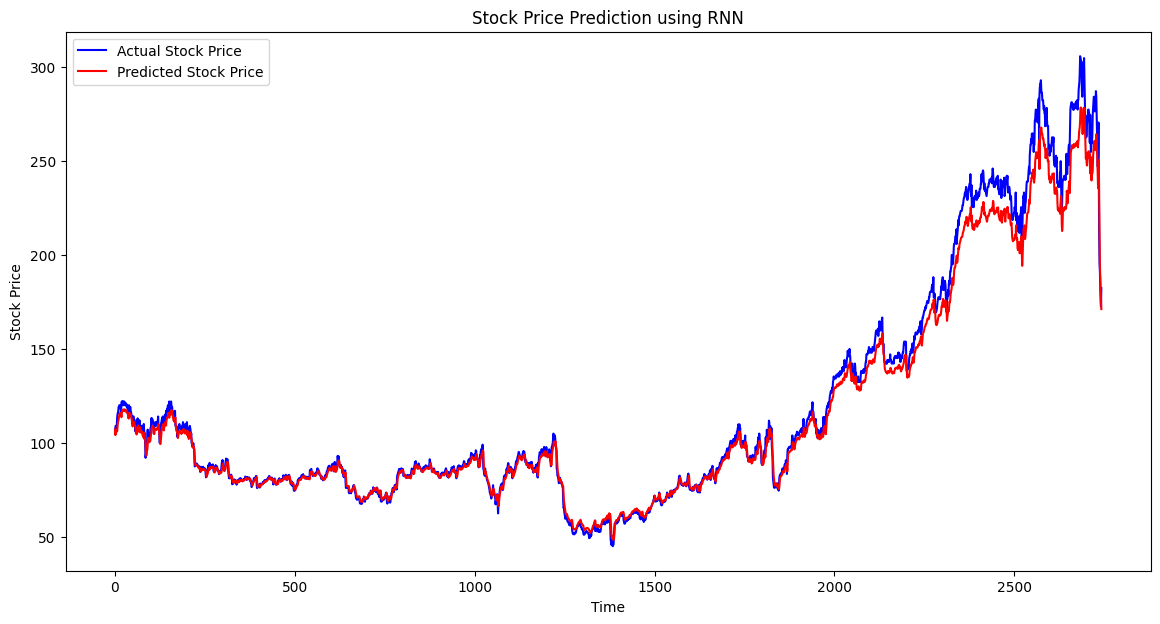

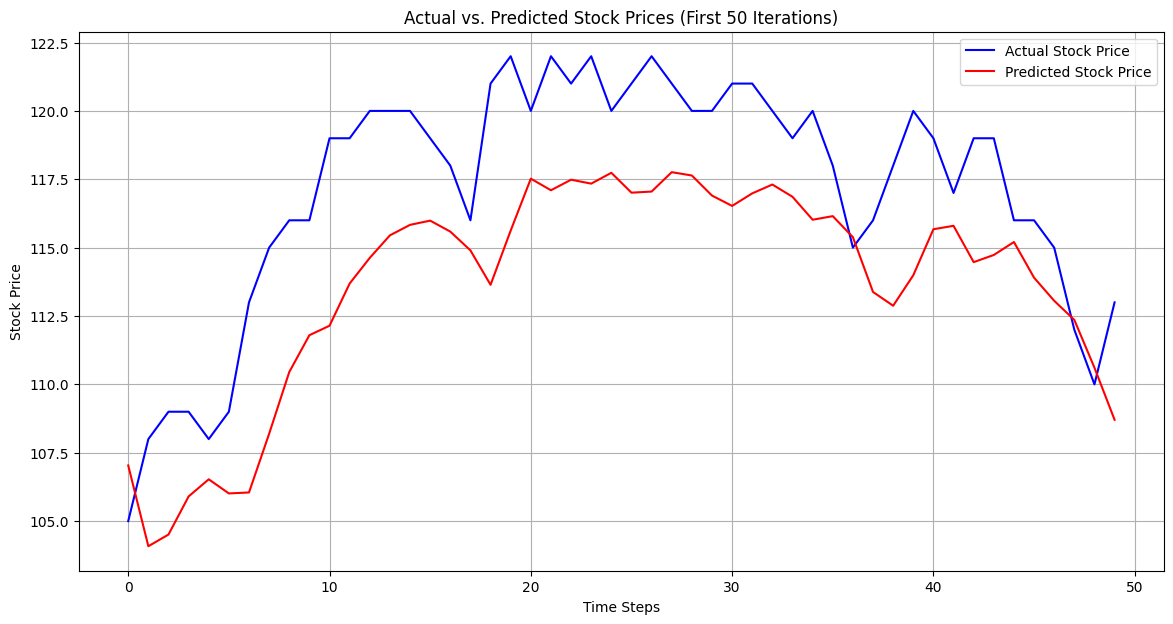

In [6]:

# Make predictions on the test set
predicted_stock_price = model.predict(X_test)

# Inverse transform to get actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))

# Prepare actual stock prices for comparison
y_test = y_test.reshape(-1, 1)
actual_stock_price = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual_stock_price, label='Actual Stock Price', color='blue')
plt.plot(predicted_stock_price, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot the actual vs. predicted stock prices for the first 100 iterations
plt.figure(figsize=(14, 7))

n=50
# Extract the first 100 actual and predicted stock prices
actual_prices_subset = actual_stock_price[:n]
predicted_prices_subset = predicted_stock_price[:n]

# Create the plot
plt.plot(actual_prices_subset, label='Actual Stock Price', color='blue')
plt.plot(predicted_prices_subset, label='Predicted Stock Price', color='red')
plt.title(f'Actual vs. Predicted Stock Prices (First {n} Iterations)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(actual_stock_price, predicted_stock_price)
r2 = r2_score(actual_stock_price, predicted_stock_price)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 58.21701984844744
R-squared (R²): 0.9845541022184239


<h3>Hypothesis 1:Increasing the dropout rate will reduce overfitting</h3>
    <ul>
        <li><strong>Rationale:</strong> Overfitting happens when the model learns patterns specific to the training data that don't generalize to new data. Increasing the dropout rate reduces reliance on specific neurons during training.</li>
        <li><strong>Validation Approach:</strong> Raise the dropout rate from 0.2 to 0.3 (or more) in LSTM layers, then monitor the training and validation losses. If the gap between them decreases, it indicates reduced overfitting.</li>
        <li><strong>Expected Outcome:</strong> Higher dropout should improve validation performance, showing better generalization. A smaller gap between training and validation losses confirms this.</li>
    </ul>

Epoch 1/50


C:\Users\Goku\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0072 - val_loss: 8.0584e-04
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 7.8112e-04 - val_loss: 6.7137e-04
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 6.9136e-04 - val_loss: 5.1620e-04
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 6.3111e-04 - val_loss: 6.5917e-04
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.0139e-04 - val_loss: 6.0231e-04
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.1013e-04 - val_loss: 0.0011
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 4.7911e-04 - val_loss: 4.0491e-04
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 4.2412e-04 - val_loss: 5.3974e-04
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 4.0809e-04 - val_loss: 4.6241e-04
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 4.2558e-04 - val_loss: 3.9321e-04
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 3.9052

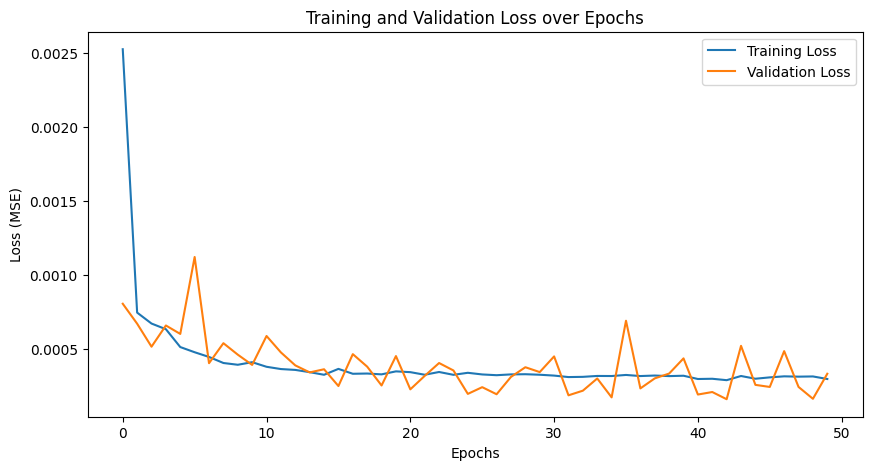

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


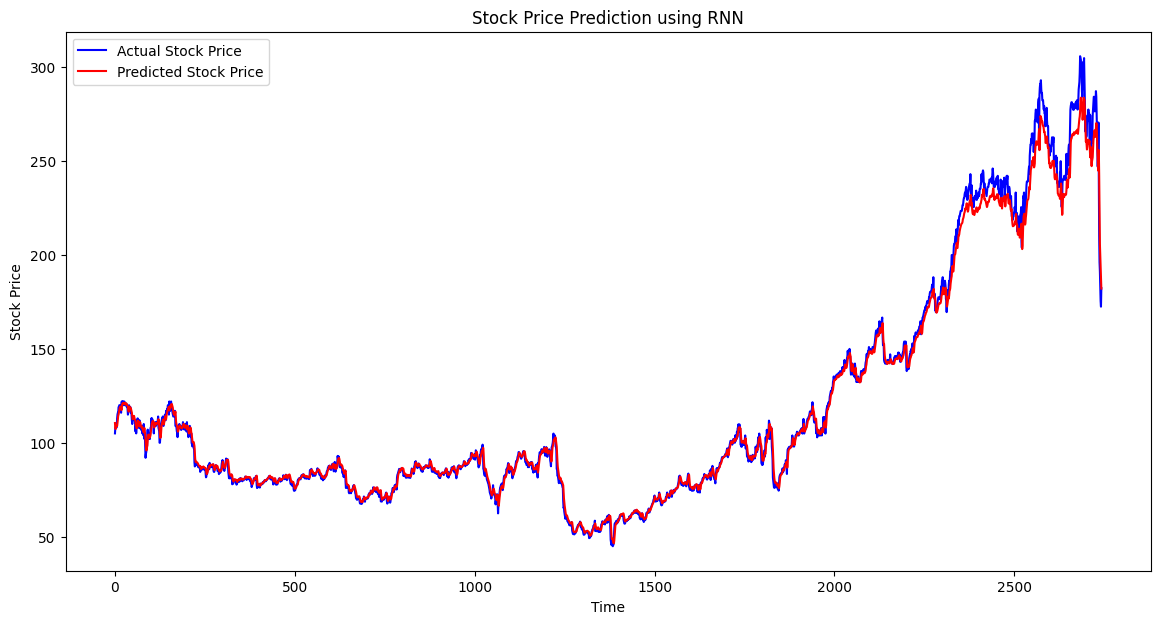

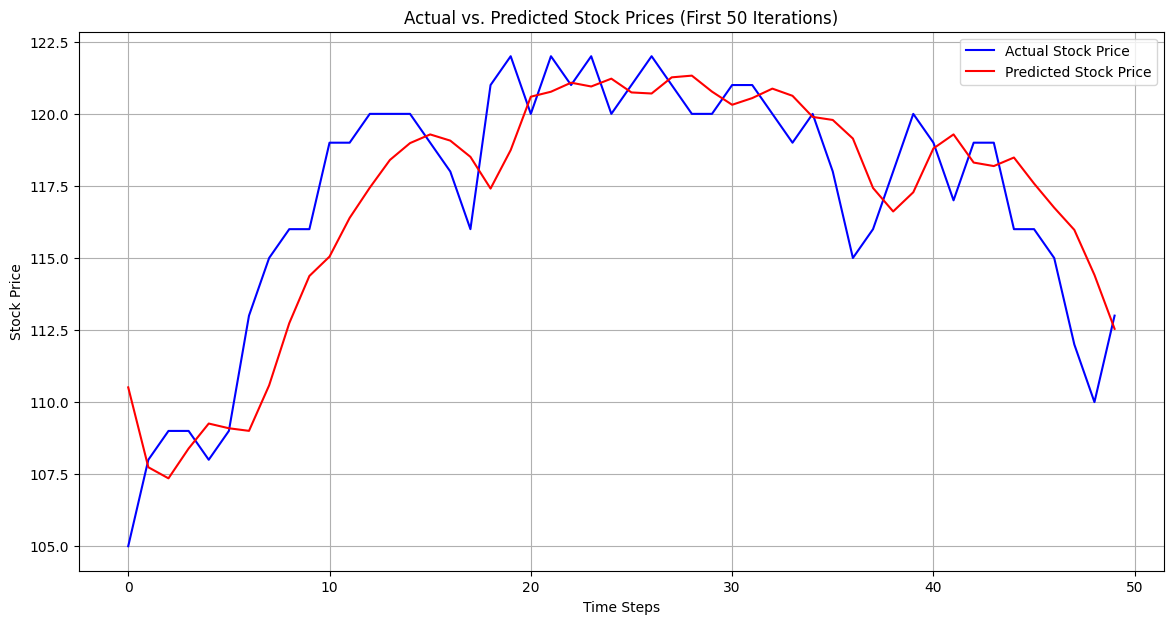

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))  # Increased dropout rate from 0.2 to 0.3
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.3))  # Increased dropout rate from 0.2 to 0.3
model.add(Dense(units=1))  # Output layer for stock price prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


# Make predictions on the test set
predicted_stock_price = model.predict(X_test)

# Inverse transform to get actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))

# Prepare actual stock prices for comparison
y_test = y_test.reshape(-1, 1)
actual_stock_price = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual_stock_price, label='Actual Stock Price', color='blue')
plt.plot(predicted_stock_price, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot the actual vs. predicted stock prices for the first 100 iterations
plt.figure(figsize=(14, 7))

n=50
# Extract the first 100 actual and predicted stock prices
actual_prices_subset = actual_stock_price[:n]
predicted_prices_subset = predicted_stock_price[:n]

# Create the plot
plt.plot(actual_prices_subset, label='Actual Stock Price', color='blue')
plt.plot(predicted_prices_subset, label='Predicted Stock Price', color='red')
plt.title(f'Actual vs. Predicted Stock Prices (First {n} Iterations)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


C:\Users\Goku\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


C:\Users\Goku\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


C:\Users\Goku\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


C:\Users\Goku\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


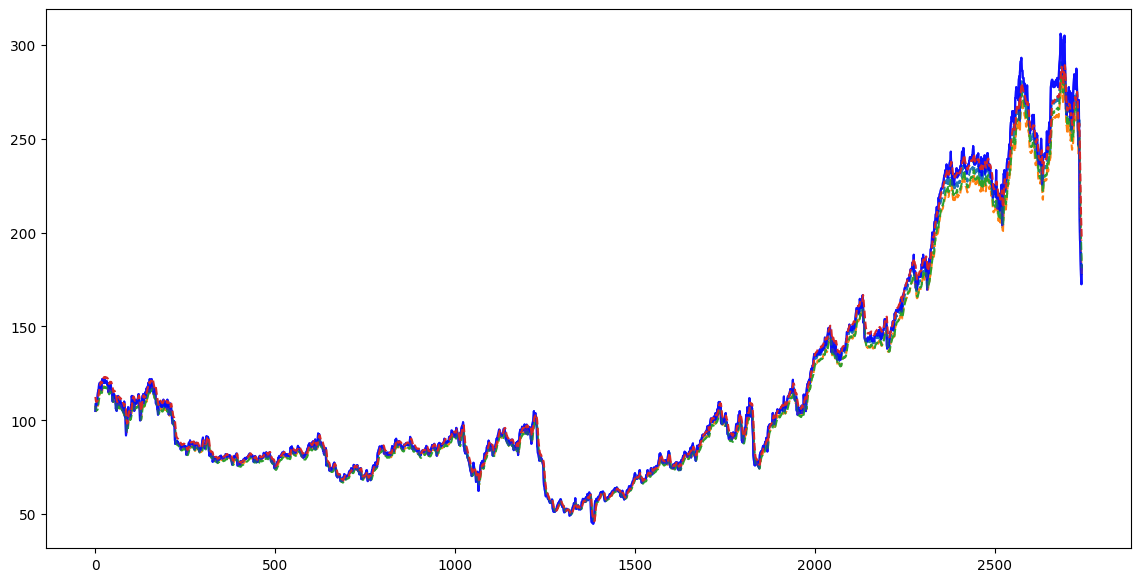

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset
df = pd.read_csv('stock_price.csv', index_col='Date', parse_dates=True)

# Use only the 'Closing Price' for prediction
data = df[['Closing Price']].copy()

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the dataset for time step of 60 days
X, y = [], []
time_step = 60  # Lookback period for prediction

for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i-time_step:i])
    y.append(scaled_data[i, 0])

# Convert lists to NumPy arrays
X, y = np.array(X), np.array(y)

# Split the dataset into training (70%) and testing (30%) sets
train_size = int(0.7 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Store predicted stock prices for each dropout rate
predicted_stock_prices = {}
actual_stock_prices = {}

# Define dropout rates to test
dropout_rates = [0.2, 0.3, 0.4, 0.5]

# Train and make predictions for each dropout rate
for dropout in dropout_rates:
    # Build the RNN model with the current dropout rate
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(dropout))
    model.add(Dense(units=1))  # Output layer for stock price prediction

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model and store the history
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Make predictions on the test set
    predicted_stock_price = model.predict(X_test)

    # Inverse transform to get actual stock prices
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))

    # Prepare actual stock prices for comparison
    y_test = y_test.reshape(-1, 1)
    actual_stock_price = scaler.inverse_transform(y_test)

    # Store the predictions and actual prices
    predicted_stock_prices[dropout] = predicted_stock_price
    actual_stock_prices[dropout] = actual_stock_price

# Plot results for each dropout model
plt.figure(figsize=(14, 7))

for dropout in dropout_rates:
    plt.plot(actual_stock_prices[dropout], label=f'Actual Stock Price (Dropout {dropout})', color='blue', alpha=0.5)
    plt.plot(predicted_stock_prices[dropout], label=f'Predicted Stock Price (Dropout {dropout})', linestyle='--')


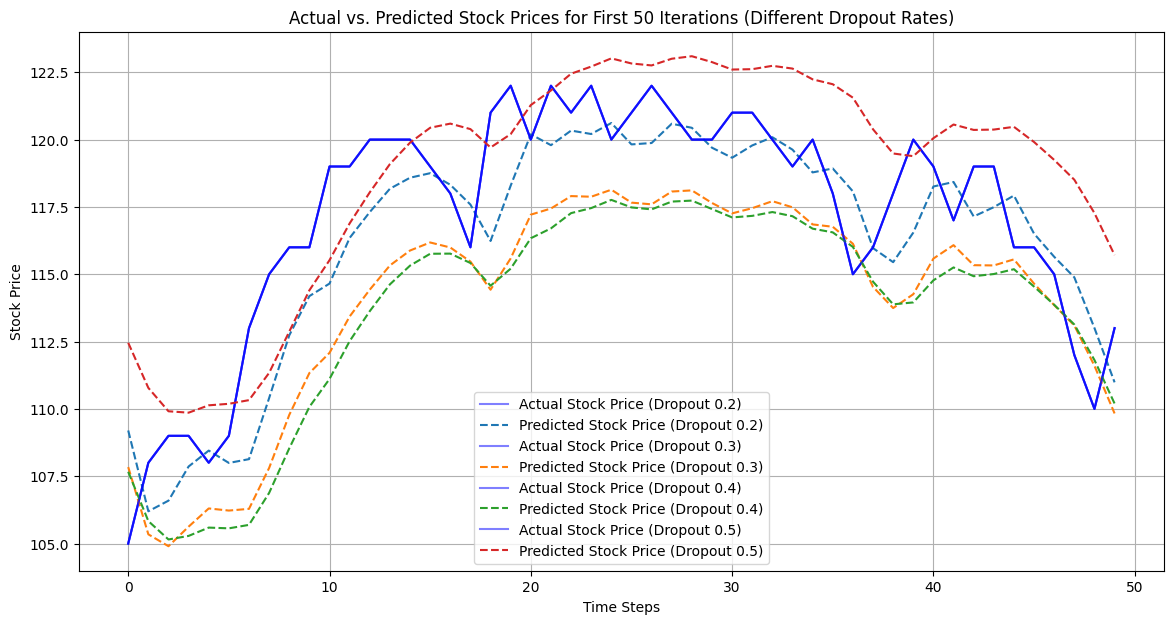

In [10]:
# Plot the actual vs. predicted stock prices for the first 100 iterations for each dropout model
n = 50  # Change this to plot a different number of iterations

plt.figure(figsize=(14, 7))

for dropout in dropout_rates:
    # Extract the first n actual and predicted stock prices
    actual_prices_subset = actual_stock_prices[dropout][:n]
    predicted_prices_subset = predicted_stock_prices[dropout][:n]

    # Create the plot for each dropout rate
    plt.plot(actual_prices_subset, label=f'Actual Stock Price (Dropout {dropout})', color='blue', alpha=0.5)
    plt.plot(predicted_prices_subset, label=f'Predicted Stock Price (Dropout {dropout})', linestyle='--')

plt.title(f'Actual vs. Predicted Stock Prices for First {n} Iterations (Different Dropout Rates)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

<h3>
Hypothesis 2: Adding More LSTM Layers Will Improve Model Performance</h3>
<ul>
    <li>Enhanced Learning: Adding more LSTM layers can improve the model's ability to capture complex patterns in the data.</li>
    <li>Diminishing Returns: After a certain point, adding more layers may yield minimal improvements in performance, necessitating a balance between model complexity and efficiency.</li>
</ul>

Epoch 1/50


C:\Users\Goku\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0058 - val_loss: 0.0014
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 7.6650e-04 - val_loss: 0.0025
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 7.3580e-04 - val_loss: 6.8878e-04
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 6.6350e-04 - val_loss: 9.3303e-04
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 6.0413e-04 - val_loss: 5.7001e-04
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 5.3309e-04 - val_loss: 5.1672e-04
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 5.1611e-04 - val_loss: 5.6883e-04
Epoch 9/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 4.6030e-04 - val_loss: 5.0270e-04
Epoch 10/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 4.2511e-04 - val_loss: 7.7935e-04
Epoch 11/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 4.7601e-04 - val_

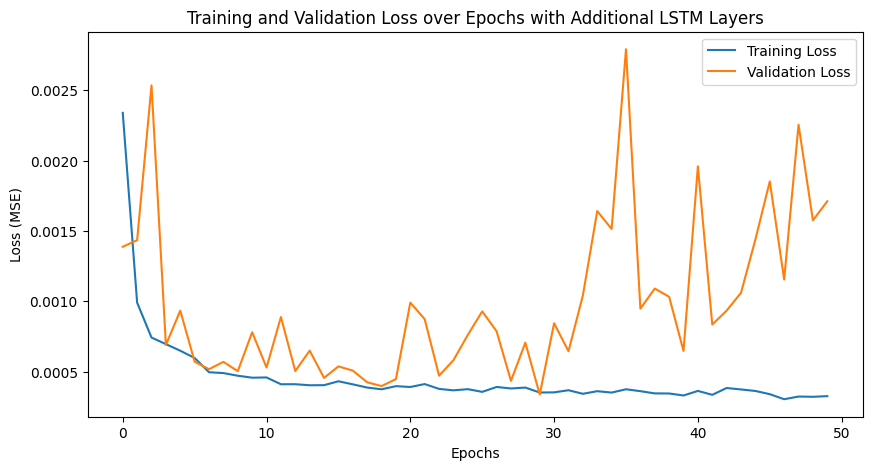

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset (assuming 'Date' is the index and 'Closing Price' is the target column)
df = pd.read_csv('stock_price.csv', index_col='Date', parse_dates=True)

# Use only the 'Closing Price' for prediction
data = df[['Closing Price']].copy()

# Calculate the 50-day Moving Average
data['MA50'] = data['Closing Price'].rolling(window=50).mean()

# Calculate the Relative Strength Index (RSI)
def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = calculate_rsi(data['Closing Price'])

# Drop NaN values (due to MA and RSI calculations)
data.dropna(inplace=True)

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the dataset for a time step of 60 days
X, y = [], []
time_step = 60  # Lookback period for prediction

for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i-time_step:i])  # Take 60 days of closing price data, MA, and RSI
    y.append(scaled_data[i, 0])  # The next day price as the target

# Convert lists to NumPy arrays
X, y = np.array(X), np.array(y)

# Split the dataset into training (70%) and testing (30%) sets
train_size = int(0.7 * X.shape[0])  # 70% of the dataset
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the RNN model with additional LSTM layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # First LSTM layer
model.add(Dropout(0.3))  # Dropout layer
model.add(LSTM(units=50, return_sequences=True))  # Second LSTM layer
model.add(Dropout(0.3))  # Dropout layer
model.add(LSTM(units=50, return_sequences=False))  # Third LSTM layer
model.add(Dropout(0.3))  # Dropout layer
model.add(Dense(units=1))  # Output layer for stock price prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs with Additional LSTM Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


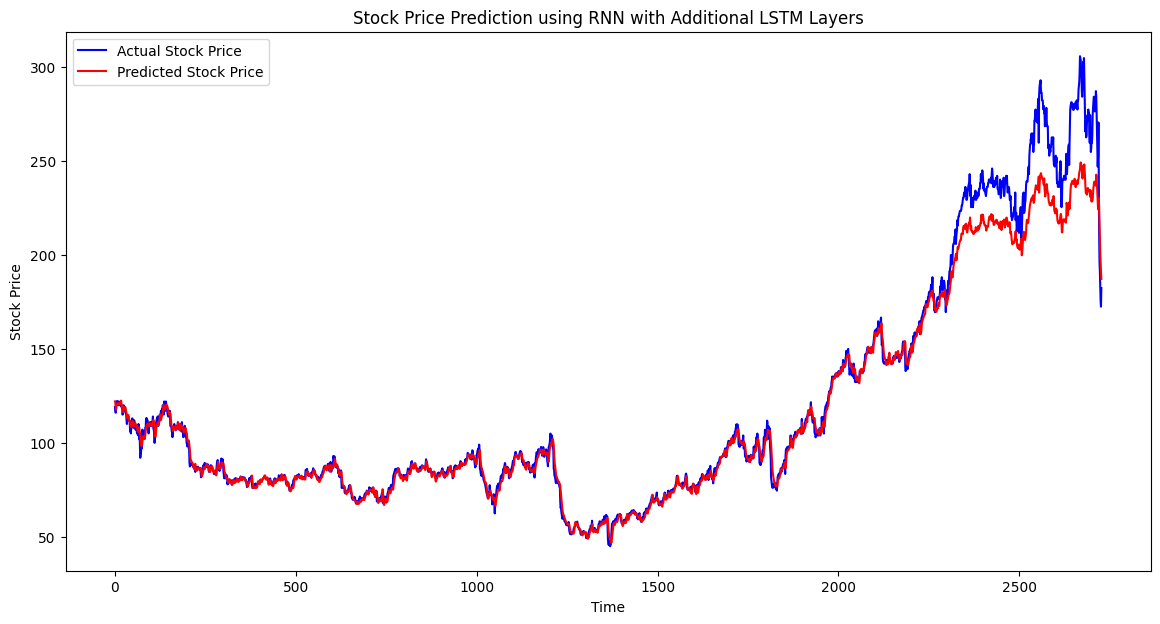

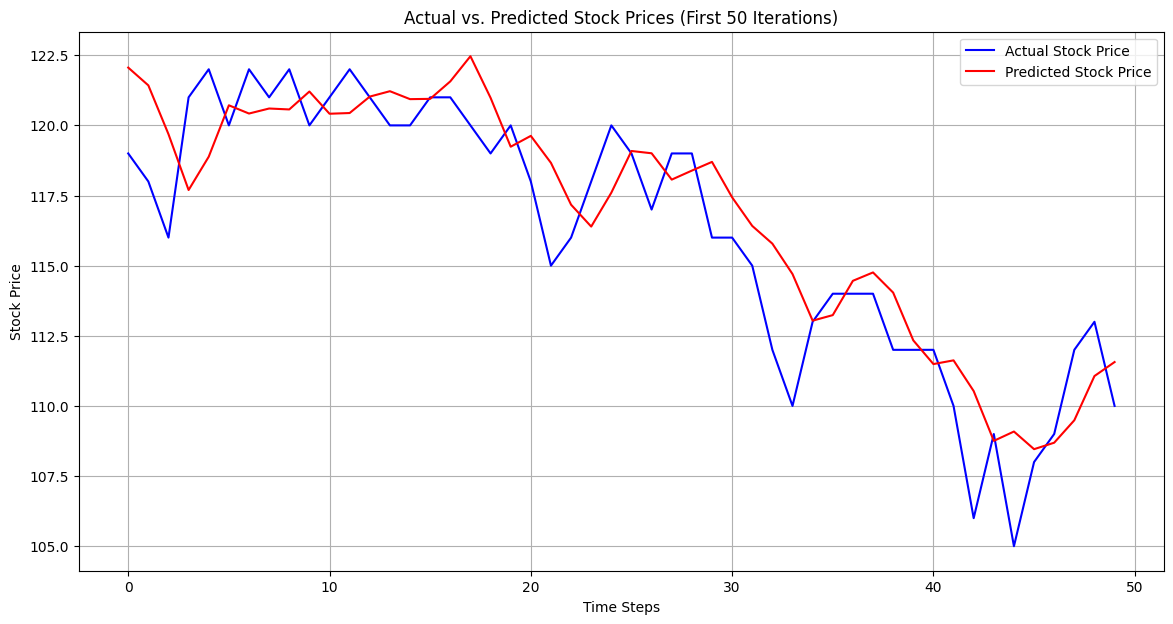

In [12]:
# Make predictions on the test set
predicted_stock_price = model.predict(X_test)

# Inverse transform to get actual stock prices
# Create a full array to inverse transform, maintaining original shape
predicted_stock_price_full = np.zeros((predicted_stock_price.shape[0], scaled_data.shape[1]))
predicted_stock_price_full[:, 0] = predicted_stock_price.flatten()  # Assign the predicted prices to the first column

# Inverse transform
predicted_stock_price = scaler.inverse_transform(predicted_stock_price_full)[:, 0]  # Get the first column

# Prepare actual stock prices for comparison
y_test = y_test.reshape(-1, 1)
actual_stock_price_full = np.zeros((y_test.shape[0], scaled_data.shape[1]))
actual_stock_price_full[:, 0] = y_test.flatten()  # Assign actual prices to the first column

# Inverse transform for actual prices
actual_stock_price = scaler.inverse_transform(actual_stock_price_full)[:, 0]  # Get the first column

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(actual_stock_price, label='Actual Stock Price', color='blue')
plt.plot(predicted_stock_price, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using RNN with Additional LSTM Layers')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot the actual vs. predicted stock prices for the first 50 iterations
plt.figure(figsize=(14, 7))

n = 50  # Change this to plot a different number of iterations
actual_prices_subset = actual_stock_price[:n]
predicted_prices_subset = predicted_stock_price[:n]

# Create the plot
plt.plot(actual_prices_subset, label='Actual Stock Price', color='blue')
plt.plot(predicted_prices_subset, label='Predicted Stock Price', color='red')
plt.title(f'Actual vs. Predicted Stock Prices (First {n} Iterations)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()
